In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../input/covid19-tweets/covid19_tweets.csv')

In [4]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [5]:
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False


# Sentiment analysis of tweets
- lets see if we can find any interesting changes in sentiment or popularity of topics in twitter in this dataset of #covid19 tweets since the start of the collected data on the 25th of July 2020
- shout out to this article https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

In [6]:
!pip install textblob

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [7]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [8]:
import re
from textblob import TextBlob

In [9]:
# for tweet cleaning
# def clean_tweet(self, tweet):
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

In [10]:
# assigning sentiment
#def get_tweet_sentiment(self, tweet): 
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
#         analysis = TextBlob(self.clean_tweet(tweet))
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [11]:
# # for counting positive and negative tweets
# ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']

- maybe we can calculate the postive, neutral and negative sentiment counts per day over the course of the last few weeks to start with

In [16]:
sentiment_list = []
for i, j in enumerate(data['text']):
    sentiment_list.append(get_tweet_sentiment(j))
    
data['sentiment'] = sentiment_list

In [17]:
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,neutral


In [26]:
data['datetime'] = pd.to_datetime(data['date'])

In [47]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'sentiment',
       'datetime'],
      dtype='object')

In [40]:
daily_data = data.groupby(by=data['datetime'].dt.date)

In [ ]:
daily_data.values_counts()

In [46]:
for i in daily_data:
    print(i[0])

2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31
2020-08-01
2020-08-02
2020-08-04
2020-08-06
2020-08-07
2020-08-08
2020-08-09


In [86]:
sent_count = []
for i in daily_data:
    sent_count.append(i[1]['sentiment'].value_counts())

In [87]:
sent_count

[positive    115
 neutral     113
 negative     67
 Name: sentiment, dtype: int64,
 positive    7324
 neutral     6760
 negative    2797
 Name: sentiment, dtype: int64,
 positive    3319
 neutral     2854
 negative    1327
 Name: sentiment, dtype: int64,
 positive    3188
 neutral     2878
 negative    1434
 Name: sentiment, dtype: int64,
 positive    3106
 neutral     3097
 negative    1297
 Name: sentiment, dtype: int64,
 positive    1229
 neutral     1109
 negative     442
 Name: sentiment, dtype: int64,
 neutral     804
 positive    803
 negative    373
 Name: sentiment, dtype: int64,
 positive    3268
 neutral     2994
 negative    1238
 Name: sentiment, dtype: int64,
 positive    3177
 neutral     2990
 negative    1333
 Name: sentiment, dtype: int64,
 positive    3240
 neutral     2809
 negative    1451
 Name: sentiment, dtype: int64,
 positive    3252
 neutral     2969
 negative    1279
 Name: sentiment, dtype: int64,
 positive    3249
 neutral     2906
 negative    1059
 Name:

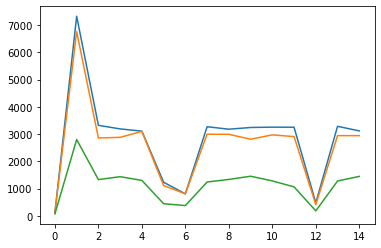

In [96]:
plt.plot(sent_count)
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (1,) and (3,)

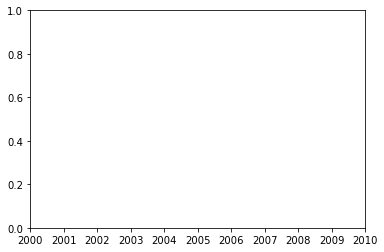

In [92]:
for i, j in enumerate(daily_data):
    plt.plot(j[0], sent_count[i])